# Question 3 Parts B and C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from IPython.display import display, Math
smp.init_printing()

In [2]:
E0, k, w, c, nx, ny = smp.symbols('E_0, k, \omega, c, n_x, n_y', real=True)
a, b, x, y, u0, e0, wnm = smp.symbols('a, b, x, y \mu_0 \epsilon_0 \omega_{nm}', real=True)

Define the electric and magnetic field which we found in part A:

In [3]:
Ex = (I*k/((w/c)**2-k**2))*E0*smp.cos(smp.pi*nx*x/a)*smp.sin(smp.pi*ny*y/b) *(smp.pi*nx/a)
Ey = (I*k/((w/c)**2-k**2))*E0*smp.sin(smp.pi*nx*x/a)*smp.cos(smp.pi*ny*y/b)*(smp.pi*ny/b)
Ez = E0*smp.sin(smp.pi*ny*y/b)*smp.sin(smp.pi*nx*x/a)
Bx = (I*w/(w**2-c**2*k**2))*E0*smp.sin(smp.pi*nx*x/a)*smp.cos(smp.pi*ny*y/b)*(smp.pi*ny/b)
By = (-I*w/(w**2-c**2*k**2))*E0*smp.cos(smp.pi*nx*x/a)*smp.sin(smp.pi*ny*y/b)*(smp.pi*nx/a)
Bz = 0

## Poynting Vector

First lets get the components of the time averaged Poyting vector $<\vec{S}>$

In [4]:
Sx = (1/(2*u0))*(Ey*Bz-Ez*By)
Sy = (1/(2*u0))*(Ez*Bx-Ex*Bz) 
Sz = (1/(2*u0))*(Ex*By-Ey*Bx) 

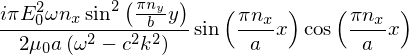

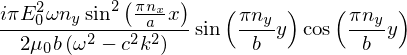

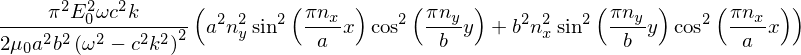

In [5]:
display(Sx.simplify())
display(Sy.simplify())
display(Sz.simplify())

### Evaluate the Integral

We are evaluating the following integral over the region $0 \leq x \leq a$ and $0 \leq y \leq b$:

$$\iint <\vec{S}> \cdot d\vec{a} = \iint S_zda $$

since $d\vec{a}$ points in the $\hat{z}$ direction.

**The integral of the poynting vector over the cross section of the rectangular wave guide represents the energy transmitted per unit time**.

Since the only $x$ and $y$ dependence is in the cosines and sines and

$$\int_{0}^a \cos^2 \left( \frac{\pi n_x}{a}x \right)dx =  \int_{0}^a \cos^2 \left( \frac{\pi n_x}{a}x \right)dx = \frac{a}{2}$$

$$\int_{0}^b \sin^2 \left( \frac{\pi n_y}{b}y \right)dy =  \int_{0}^b \cos^2 \left( \frac{\pi n_y}{b}y \right)dy = \frac{b}{2}$$

we can simply replace the trig expressions in $u$ with these values to perform effective integration over $0 \leq x \leq a$ and $0 \leq y \leq b$.

In [6]:
S_int = Sz.subs(smp.sin(smp.pi*ny*y/b)**2, b/2)
S_int = S_int.subs(smp.cos(smp.pi*ny*y/b)**2, b/2)
S_int = S_int.subs(smp.sin(smp.pi*nx*x/a)**2, a/2)
S_int = S_int.subs(smp.cos(smp.pi*nx*x/a)**2, a/2)
S_int = S_int.simplify()

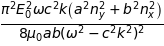

In [7]:
display(S_int)

Further simplification using the facts that

$$(9.180) \implies a^2 n_y^2+b^2 n_x^2 = \frac{1}{a^2 b^2}\left(\frac{\omega_{nm}}{\pi c} \right)^2$$

$$(\text{Known Fact}) \implies \frac{1}{\epsilon_0 \mu_0}=c^2 $$

In [8]:
S_int = S_int.subs(a**2*ny**2+b**2*nx**2, a**2*b**2*(wnm/(smp.pi*c))**2)
S_int = S_int.subs(w**2-c**2*k**2, wnm**2)

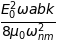

In [9]:
display(S_int)

## Energy Density

In [10]:
u = Rational(1, 4)*(e0*(Ex*conjugate(Ex)+Ey*conjugate(Ey)+Ez*conjugate(Ez))+
                    (1/u0)*(Bx*conjugate(Bx)+By*conjugate(By)+Bz*conjugate(Bz)))

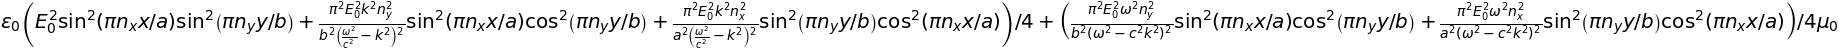

In [11]:
display(u)

### Evaluate the Integral

We are evaluating the following integral over the region $0 \leq x \leq a$ and $0 \leq y \leq b$:

$$\iint u \cdot da $$

**The integral of the energy density over the cross section of the rectangular wave guide represents the energy transmitted per unit length**.

Since the only $x$ and $y$ dependence is in the cosines and sines and

$$\int_{0}^a \cos^2 \left( \frac{\pi n_x}{a}x \right)dx =  \int_{0}^a \cos^2 \left( \frac{\pi n_x}{a}x \right)dx = \frac{a}{2}$$

$$\int_{0}^b \sin^2 \left( \frac{\pi n_y}{b}y \right)dy =  \int_{0}^b \cos^2 \left( \frac{\pi n_y}{b}y \right)dy = \frac{b}{2}$$

we can simply replace the trig expressions in $u$ with these values to perform effective integration over $0 \leq x \leq a$ and $0 \leq y \leq b$.

In [12]:
u_int = u.subs(smp.sin(smp.pi*ny*y/b)**2, b/2)
u_int = u_int.subs(smp.cos(smp.pi*ny*y/b)**2, b/2)
u_int = u_int.subs(smp.sin(smp.pi*nx*x/a)**2, a/2)
u_int = u_int.subs(smp.cos(smp.pi*nx*x/a)**2, a/2)
u_int =u_int.simplify()

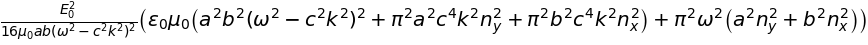

In [13]:
display(u_int)

Further simplification using the facts that

$$(9.180) \implies a^2 n_y^2+b^2 n_x^2 = \frac{1}{a^2 b^2}\left(\frac{\omega_{nm}}{\pi c} \right)^2$$

$$(\text{Known Fact}) \implies \frac{1}{\epsilon_0 \mu_0}=c^2 $$

$$(9.190) \implies \omega^2-c^2 k^2 = \omega_{nm}^2$$

In [14]:
u_int = u_int.subs(a**2*ny**2+b**2*nx**2, a**2*b**2*(wnm/(smp.pi*c))**2)
u_int = u_int.subs(a**2*ny**2, -b**2*nx**2+a**2*b**2*(wnm/(smp.pi*c))**2)
u_int = u_int.subs(w**2-c**2*k**2, wnm**2)
u_int = u_int.subs(e0*u0, 1/c**2)
u_int = u_int.subs(c**2*k**2, w**2-wnm**2)
u_int = u_int.simplify()

(Note: It took some trial and error here- that's why there is so many different substitutions)

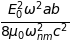

In [15]:
display(u_int)

## Ratio

The speed at which energy is transmitted through the wave guide is going to be the ratio

$$\frac{\int <\vec{S}> \cdot d\vec{a}}{\int uda} $$

In [16]:
rat = (S_int/u_int).simplify()
rat

Note that 

$$\frac{c^2k}{\omega}=\frac{c}{\omega}\sqrt{\omega^2-\omega_{nm}^2} = v_g $$

as defined in equation (9.192).